<a href="https://colab.research.google.com/github/sergioGarcia91/ML_and_EDA/blob/main/08a_MinimoLocal_MinimoGlobal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descenso del Gradiente: Mínimo Local y Mínimo Global

> *Ser tan rápidos como el más lento, \
> y ser tan lentos como el más rápido.*

**Autor:** Sergio Andrés García Arias  
**Versión 01:** Julio 2024

# Introducción

El concepto de optimización de funciones implica encontrar el valor mínimo o máximo de una función, considerando algunas restricciones como el espacio, rango o dominio de estudio. En nuestro caso, nos interesa encontrar el punto donde la función alcanza su valor mínimo. Sin embargo, una función puede tener diferentes valores mínimos, que se pueden clasificar en dos tipos:

- **Mínimo Global:** Es el punto en el dominio de la función donde alcanza su valor más bajo en comparación con todos los demás puntos. No hay otro punto con un valor de función menor que el mínimo global.
- **Mínimo Local:** Es un punto en el dominio de la función donde tiene un valor menor que en los puntos cercanos, pero no necesariamente es el valor más bajo globalmente. Existen puntos con valores de función menores que el mínimo local.

Uno de los algoritmos más utilizados para encontrar estos mínimos es el **descenso del gradiente**. Este algoritmo se basa en la idea de actualizar iterativamente los parámetros del modelo en la dirección opuesta al gradiente de la función de pérdida con respecto a esos parámetros.

<center>
<img src='https://www.researchgate.net/profile/Mohamed-Ahmed-345/publication/341902041/figure/fig2/AS:898633943752704@1591262436077/local-minima-vs-global-minimum.ppm' width=500 />

Local minima vs. Global minimum. *Fuente: [ResearchGate](https://www.researchgate.net/figure/local-minima-vs-global-minimum_fig2_341902041
)*
</center>

> **Observación 1:** Es importante entender cómo se relaciona la pendiente en un punto de una función, es decir, la derivada en ese punto. Para determinar si un punto de una función es un máximo o un mínimo, se debe evaluar la pendiente en ese punto. Si la pendiente es 0, entonces puede ser un mínimo o un máximo, dependiendo de la concavidad en ese punto.

> **Observación 2:** El cálculo del gradiente de una función indica la dirección en la que la función crece. Como estamos buscando el valor mínimo y no el máximo, debemos movernos en la dirección opuesta al gradiente. Por esta razón, restamos el gradiente en cada paso del descenso del gradiente.




# Inicio

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Descenso del Gradiente

El **descenso del gradiente** es un algoritmo comúnmente utilizado para encontrar mínimos en una función *de pérdida*. Consiste en iterar sobre los parámetros del modelo ajustándolos en la dirección opuesta al gradiente de la función *de pérdida*. Los pasos son los siguientes:

1. **Inicialización:** Comenzar con un punto inicial en el espacio de parámetros.
2. **Cálculo del Gradiente:** Calcular el gradiente de la función en el punto actual.
3. **Actualización de Parámetros:** Actualizar los parámetros en la dirección opuesta al gradiente.
4. **Repetición:** Repetir los pasos anteriores hasta que se alcance la convergencia. Es decir, el gradiente sea cercano a cero o el cambio en la función de pérdida sea insignificante.

Se expresaría como:

$$
\begin{equation}
\theta_{new} = \theta_{old} - \eta \nabla f(\theta_{old})
\end{equation}
$$

donde:
- $\theta$ son los parámetros del modelo.
- $\eta$ es la tasa de aprendizaje o learning rate.
- $\nabla f(\theta)$ es el gradiente de la función con respecto a los parámetros.



## Función Ejemplo 1

Para simplificar los cálculos, consideremos una función que depende de un único parámetro $x$. La función es la siguiente:

$$
\begin{equation}
f1(x) = x^3 - 3x^2 + 2
\end{equation}
$$

La derivada de esta función es:

$$
\begin{equation}
f1'(x) = 3x^2 - 6x
\end{equation}
$$

In [2]:
#@title f1 v1
# Vamos a definir nuestra primera función para entender como funciona el descenso del gradiente
def f1(x):
    return x**3 - 3*x**2 + 2

# La derivada de la función 1 sería
def df1(x):
    return 3*x**2 - 6*x


# Implementamos el descenso del gradiente para f1
def gradient_descent_f1(learning_rate, num_iterations, initial_x, texto):
    x = initial_x
    x_history = []
    print('X inicial:', initial_x)
    print('Learning Rate:', learning_rate)
    print('Número iteraciones:', num_iterations)
    print('----------------')
    x_history.append(x)

    for i in range(num_iterations):
      grad = df1(x)
      if texto==True:
        print(f'Iteración {i} --> Valor x: {x} --> Gradiente:{grad}')
      x = x - learning_rate * grad
      if texto==True:
        print('x new', x)
        print('\n')
      x_history.append(x)
    # en x esta solo la última actualización
    return x, x_history

def graficar_f1(learning_rate, num_iterations, initial_x, texto=True):
  x_final, x_history = gradient_descent_f1(learning_rate, num_iterations, initial_x, texto=texto)

  # Espacio de la funcion
  x_values = np.linspace(-3, 4, 400)
  y_values = f1(x_values)

  y = list(map(f1, x_history)) # valores calculados para lso x ajustados

  plt.figure(figsize=(7, 4))
  plt.plot(x_values, y_values, c='k', label='f(x)', alpha=0.8)
  for i in range(len(x_history)):
      plt.scatter(x_history[i], y[i], label=f'ite:{i}')
  plt.xlim(-3, 4)
  plt.ylim(-3, 4)
  plt.xlabel('x')
  plt.ylabel('f1(x)')
  plt.title('$f1(x) = x^3 - 3x^2 + 2$')
  plt.grid(ls='--', alpha=0.8, color='grey')
  plt.legend()
  plt.show()



X inicial: -0.1
Learning Rate: 0.1
Número iteraciones: 10
----------------
Iteración 0 --> Valor x: -0.1 --> Gradiente:0.6300000000000001
x new -0.16300000000000003


Iteración 1 --> Valor x: -0.16300000000000003 --> Gradiente:1.0577070000000002
x new -0.26877070000000003


Iteración 2 --> Valor x: -0.26877070000000003 --> Gradiente:1.8293372675354702
x new -0.45170442675354705


Iteración 3 --> Valor x: -0.45170442675354705 --> Gradiente:3.322337227967534
x new -0.7839381495503004


Iteración 4 --> Valor x: -0.7839381495503004 --> Gradiente:6.547305964262851
x new -1.4386687459765855


Iteración 5 --> Valor x: -1.4386687459765855 --> Gradiente:14.841315757809037
x new -2.922800321757489


Iteración 6 --> Valor x: -2.922800321757489 --> Gradiente:43.16508709314198
x new -7.239309031071688


Iteración 7 --> Valor x: -7.239309031071688 --> Gradiente:200.65863992849845
x new -27.305173023921533


Iteración 8 --> Valor x: -27.305173023921533 --> Gradiente:2400.5484597424056
x new -267.3600

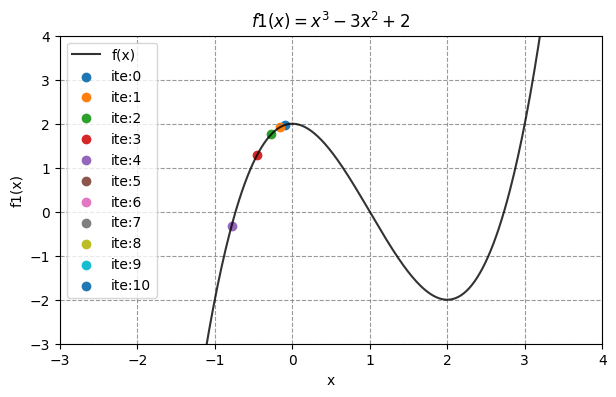

In [3]:
learning_rate = 0.1
num_iterations = 10
initial_x = -0.1

graficar_f1(learning_rate, num_iterations, initial_x, texto=True)

Si evaluamos la función en $x = 0$ y $x = 2$, parece que nuestro valor de $x$ no se ajusta. Esto se debe a que, como la pendiente ya es $0$ en esos puntos, no ocurrirán ajustes. Para abordar esto, vamos a ajustar un poco la función de descenso del gradiente, incluyendo un $\epsilon$ que debe ser pequeño para garantizar que no nos quedemos en el valor máximo, como está ocurriendo.


$$
\begin{equation}
\theta_{new} = \theta_{old} - \eta \nabla f(\theta_{old}) + \epsilon
\end{equation}
$$


In [4]:
#@title f1 v2
# Vamos a definir nuestra primera función para entender como funciona el descenso del gradiente
def f1(x):
    return x**3 - 3*x**2 + 2

# La derivada de la función 1 sería
def df1(x):
    return 3*x**2 - 6*x

# Implementamos el descenso del gradiente para f1
def gradient_descent_f1(learning_rate, num_iterations, initial_x, epsilon, texto):
    x = initial_x
    x_history = []
    print('X inicial: ', initial_x)
    print('Learning Rate: ', learning_rate)
    print('Número iteraciones: ', num_iterations)
    print('Epsilon: ', epsilon)
    print('----------------')
    x_history.append(x)

    for i in range(num_iterations):
      grad = df1(x)
      if texto==True:
        print(f'Iteración {i} --> Valor x: {x} --> Gradiente:{grad}')
      x = x - learning_rate * grad + epsilon # se suma el epsilon
      if texto==True:
        print('x new', x)
        print('\n')
      x_history.append(x)
    # en x esta solo la última actualización
    return x, x_history

def graficar_f1(learning_rate, num_iterations, initial_x, epsilon, texto=True):
  x_final, x_history = gradient_descent_f1(learning_rate, num_iterations, initial_x, epsilon, texto=texto)

  # Espacio de la funcion
  x_values = np.linspace(-3, 4, 400)
  y_values = f1(x_values)

  y = list(map(f1, x_history)) # valores calculados para lso x ajustados

  plt.figure(figsize=(7, 4))
  plt.plot(x_values, y_values, c='k', label='f(x)', alpha=0.8)
  for i in range(len(x_history)):
      plt.scatter(x_history[i], y[i], label=f'ite:{i}')
  plt.xlim(-3, 4)
  plt.ylim(-3, 4)
  plt.xlabel('x')
  plt.ylabel('f1(x)')
  plt.title('$f1(x) = x^3 - 3x^2 + 2$')
  plt.grid(ls='--', alpha=0.8, color='grey')
  plt.legend()
  plt.show()


X inicial:  0
Learning Rate:  0.1
Número iteraciones:  10
Epsilon:  0.01
----------------


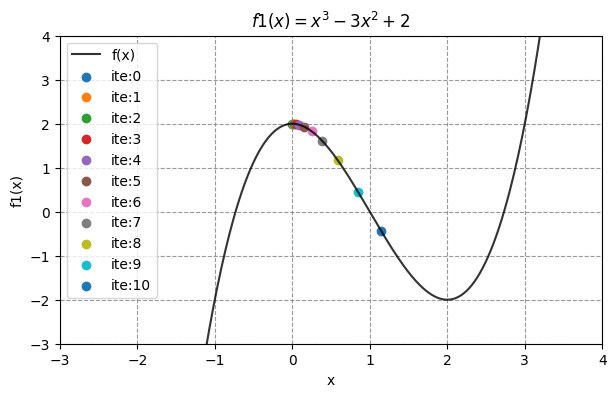

In [5]:
learning_rate = 0.1
num_iterations = 10
initial_x = 0
epsilon=0.01

graficar_f1(learning_rate, num_iterations, initial_x, epsilon, texto=False)

## Función Ejemplo 2

La función es la siguiente:

$$
\begin{equation}
f2(x) = x^6 + 0.2x^5 - 3x^4 + 2x^2 +1
\end{equation}
$$

La derivada de esta función es:

$$
\begin{equation}
f2'(x) = 6x^5 + 1x^4 - 12x^3 + 4x^1
\end{equation}
$$

In [6]:
#@title f2
def f2(x):
    return x**6 + 0.2*x**5 - 3*x**4 + 0*x**3 + 2*x**2 + 0*x**1 + 1

def df2(x):
    return 6*x**5 + (0.2*5)*x**4 - (3*4)*x**3 + (0*3)*x**2 + (2*2)*x + (0*1)*x**0 + 0

# Implementamos el descenso del gradiente para f2
def gradient_descent_f2(learning_rate, num_iterations, initial_x, epsilon, texto):
    x = initial_x
    x_history = []
    print('X inicial: ', initial_x)
    print('Learning Rate: ', learning_rate)
    print('Número iteraciones: ', num_iterations)
    print('Epsilon: ', epsilon)
    print('----------------')
    x_history.append(x)

    for i in range(num_iterations):
      grad = df2(x)
      if texto==True:
        print(f'Iteración {i} --> Valor x: {x} --> Gradiente:{grad}')
      x = x - learning_rate * grad + epsilon # se suma el epsilon
      if texto==True:
        print('x new', x)
        print('\n')
      x_history.append(x)
    # en x esta solo la última actualización
    return x, x_history

def graficar_f2(learning_rate, num_iterations, initial_x, epsilon, texto=True):
  x_final, x_history = gradient_descent_f2(learning_rate, num_iterations, initial_x, epsilon, texto=texto)

  # Espacio de la funcion
  x_values = np.linspace(-1.7, 1.5, 100)
  y_values = f2(x_values)

  y = list(map(f2, x_history)) # valores calculados para lso x ajustados

  plt.figure(figsize=(7, 4))
  plt.plot(x_values, y_values, c='k', label='f(x)', alpha=0.8)
  for i in range(len(x_history)):
      plt.scatter(x_history[i], y[i], label=f'ite:{i}')
  plt.xlim(-2, 2)
  plt.ylim(-0.5, 2)
  plt.xlabel('x')
  plt.ylabel('f2(x)')
  plt.title('$f2(x) = x^6 + 0.2x^5 - 3x^4 + 2x^2 +1$')
  plt.grid(ls='--', alpha=0.8, color='grey')
  plt.legend()
  plt.show()




X inicial:  -0.7
Learning Rate:  0.1
Número iteraciones:  10
Epsilon:  0.01
----------------


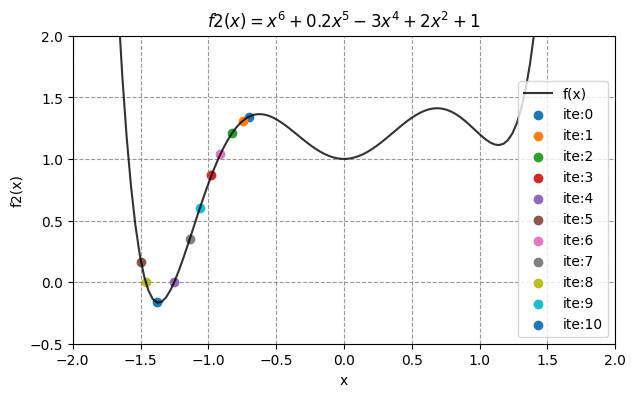

In [7]:
learning_rate = 0.1
num_iterations = 10
initial_x = -0.7
epsilon=0.01

graficar_f2(learning_rate, num_iterations, initial_x, epsilon, texto=False)

X inicial:  -0.269
Learning Rate:  0.1
Número iteraciones:  10
Epsilon:  0.01
----------------


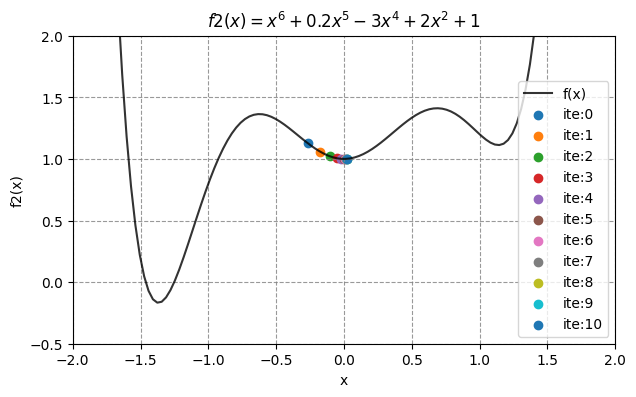

In [8]:
# Para que sea aleatoria el inicio
vmin = -1.5
vmax = 1.5
xinit = np.round(vmin + (np.random.rand(1)[0] * (vmax - vmin)), 3)

learning_rate = 0.1
num_iterations = 10
initial_x = xinit
epsilon=0.01

graficar_f2(learning_rate, num_iterations, initial_x, epsilon, texto=False)

X inicial:  0.617
Learning Rate:  0.01
Número iteraciones:  10
Epsilon:  0.01
----------------


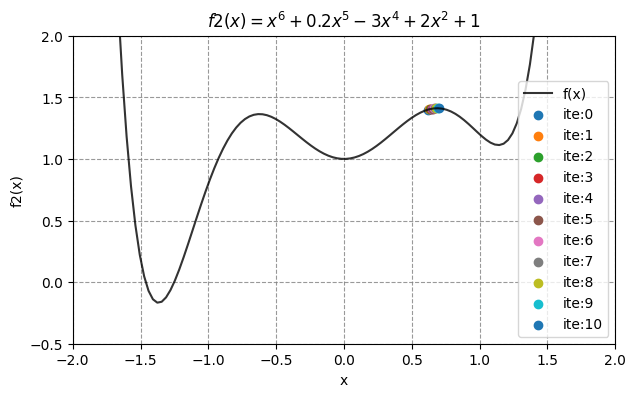

X inicial:  -0.672
Learning Rate:  0.01
Número iteraciones:  10
Epsilon:  0.01
----------------


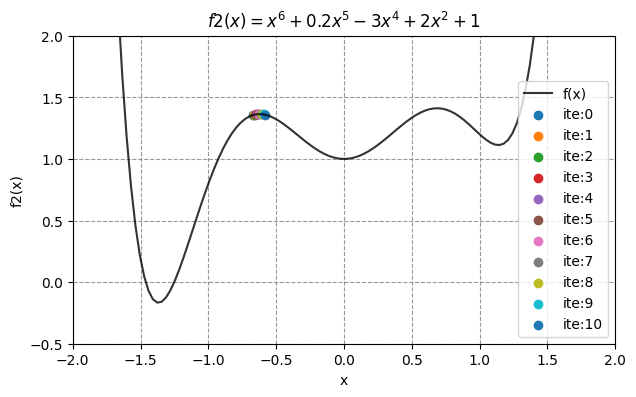

X inicial:  -0.779
Learning Rate:  0.01
Número iteraciones:  10
Epsilon:  0.01
----------------


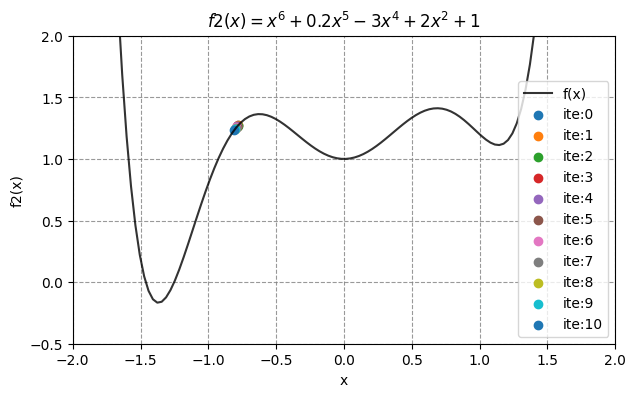

X inicial:  0.138
Learning Rate:  0.01
Número iteraciones:  10
Epsilon:  0.01
----------------


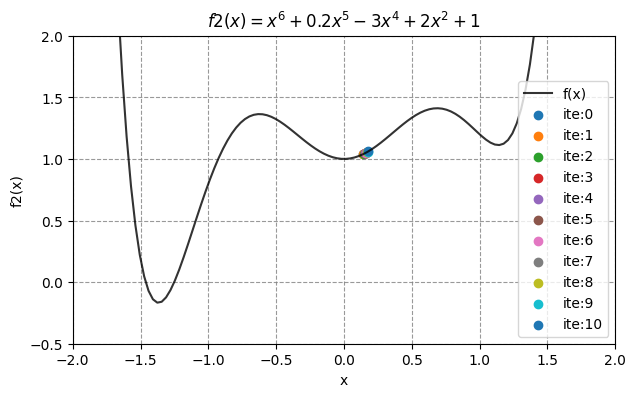

X inicial:  0.208
Learning Rate:  0.01
Número iteraciones:  10
Epsilon:  0.01
----------------


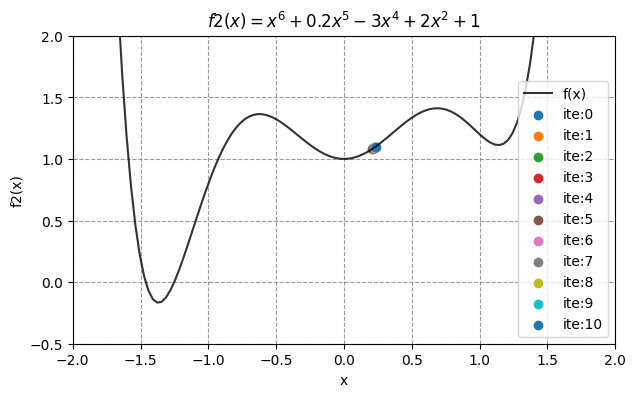

In [9]:
# En bucle
for _ in range(5):
  # Para que sea aleatoria el inicio
  vmin = -1.5
  vmax = 1.5
  xinit = np.round(vmin + (np.random.rand(1)[0] * (vmax - vmin)), 3)

  learning_rate = 0.01
  num_iterations = 10
  initial_x = xinit
  epsilon=0.01

  graficar_f2(learning_rate, num_iterations, initial_x, epsilon, texto=False)

En este caso, hemos analizado la función considerando un único parámetro $x$. Sin embargo, cuando se trata de múltiples parámetros, es necesario calcular la derivada para cada uno de ellos, lo que puede ser una tarea más compleja y tediosa. Afortunadamente, los algoritmos ya están implementados; nuestra tarea es entenderlos para usarlos correctamente.

A pesar de la complejidad adicional, es crucial tener en cuenta cómo la tasa de aprendizaje o *learning rate*, el número de iteraciones y el punto de partida afectan el proceso de optimización. Estos factores pueden influir significativamente en nuestra capacidad para acercarnos al mínimo global deseado o, por el contrario, alejarnos de él.

# Fin